## 🌟 Problem Statement
To implement an Autoencoder-based anomaly detection model using deep learning. The goal is to encode input data into a latent representation and reconstruct it, detecting anomalies based on reconstruction error. <p>

## ✦ Description of the Problem
Autoencoders learn compressed representations of normal data. When abnormal data is passed through the network, reconstruction error increases — allowing detection of anomalies. This assignment requires implementing the encoder, decoder, compiling the model, and evaluating its effectiveness. <p>

## ✦ Program Details
- Import necessary deep learning libraries <br>
- Load dataset (e.g., ECG data, images, or tabular dataset) <br>
- Build encoder (dimensionality reduction) <br>
- Build decoder (reconstruction)<br>
- Compile using suitable optimizer and loss<br>
- Train on normal data <br>
- Compute reconstruction error to flag anomalies <br>

#### a. Import required libraries

In [31]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

#### b. Upload / access the dataset

In [33]:
# Load the ECG dataset
ecg_dataset = pd.read_csv(r"/Users/mel/Desktop/ecg.csv")

In [34]:
# Preprocess the data
scaler = StandardScaler()
X = scaler.fit_transform(ecg_dataset.values)
y = X  # Autoencoder input and output are the same

X_train, X_test, _, _ = train_test_split(X, X, test_size=0.2, random_state=42)

In [35]:
# Build and train the Autoencoder model
input_dim = X_train.shape[1]

#### c. Encoder converts it into latent representation

In [37]:
encoder = models.Sequential([
    layers.Input(shape=(input_dim,)),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(8, activation='relu')
])

2025-11-16 15:34:12.793274: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2025-11-16 15:34:12.793490: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-11-16 15:34:12.793676: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2025-11-16 15:34:12.794370: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-11-16 15:34:12.794925: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


#### d. Decoder networks convert it back to the original input

In [39]:
decoder = models.Sequential([
    layers.Input(shape=(8,)),
    layers.Dense(16, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(input_dim, activation='linear')  # Use linear activation for reconstruction
])

#### e. Compile the models with Optimizer, Loss, and Evaluation Metrics

In [41]:
autoencoder = models.Sequential([
    encoder,
    decoder
])
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.fit(X_train, X_train, epochs=10, batch_size=32, shuffle=True)

Epoch 1/10


2025-11-16 15:34:13.570939: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
2025-11-16 15:34:13.577122: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.8607
Epoch 2/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.3917
Epoch 3/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.2747
Epoch 4/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.2523
Epoch 5/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.2504
Epoch 6/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.2362
Epoch 7/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.2252
Epoch 8/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.2090
Epoch 9/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.1898
Epoch 10/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.1996


In [42]:
# Detect anomalies
y_pred = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - y_pred, 2), axis=1)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step


In [43]:
# Define a threshold for anomaly detection
threshold = np.percentile(mse, 95)  # Adjust the percentile as needed

In [44]:
# Predict anomalies
anomalies = mse > threshold

In [45]:
# Calculate the number of anomalies
num_anomalies = np.sum(anomalies)
print(f"Number of Anomalies: {num_anomalies}")

Number of Anomalies: 50


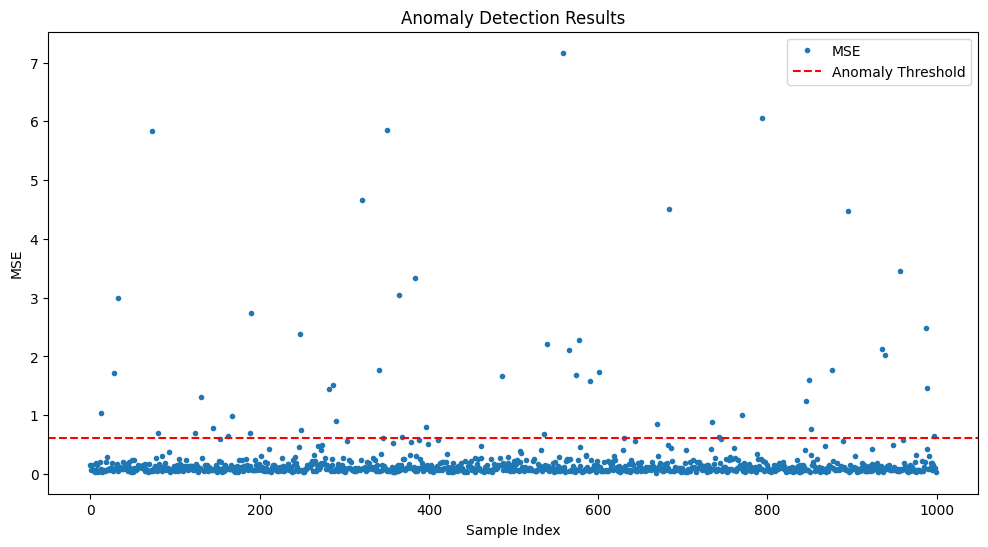

In [46]:
# Plot the anomalies
plt.figure(figsize=(12, 6))
plt.plot(mse, marker='o', linestyle='', markersize=3, label='MSE')
plt.axhline(threshold, color='r', linestyle='--', label='Anomaly Threshold')
plt.xlabel('Sample Index')
plt.ylabel('MSE')
plt.title('Anomaly Detection Results')
plt.legend()
plt.show()

#### Visualize Normal

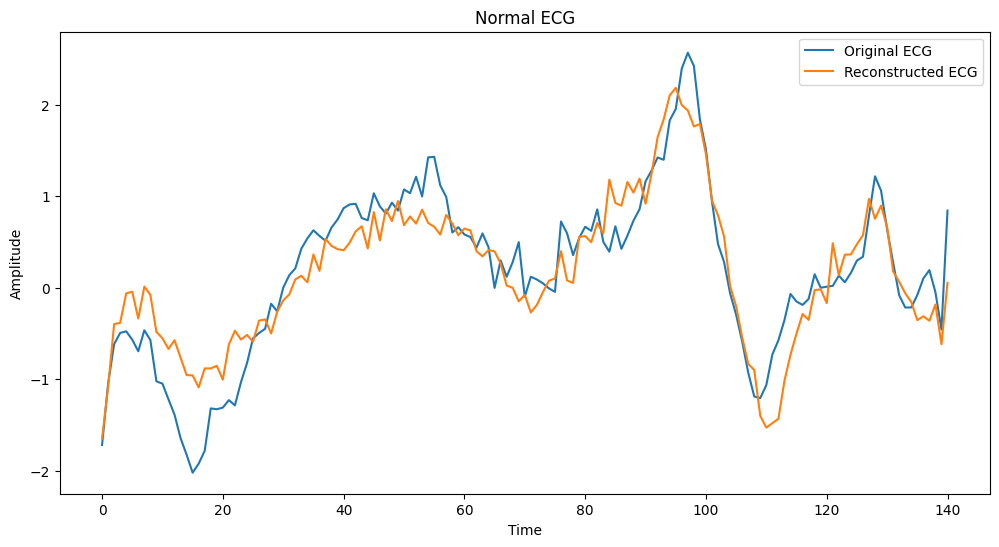

In [48]:
plt.figure(figsize=(12, 6))
plt.plot(X_test[0], label='Original ECG')
plt.plot(y_pred[0], label='Reconstructed ECG')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.title('Normal ECG')
plt.show()

#### Visualize Anomaly

In [50]:
# listing the index of anomalies in X_test
anomalies_index = []
for index, anomaly in enumerate(anomalies):
    if anomaly == True :
        anomalies_index.append(index)

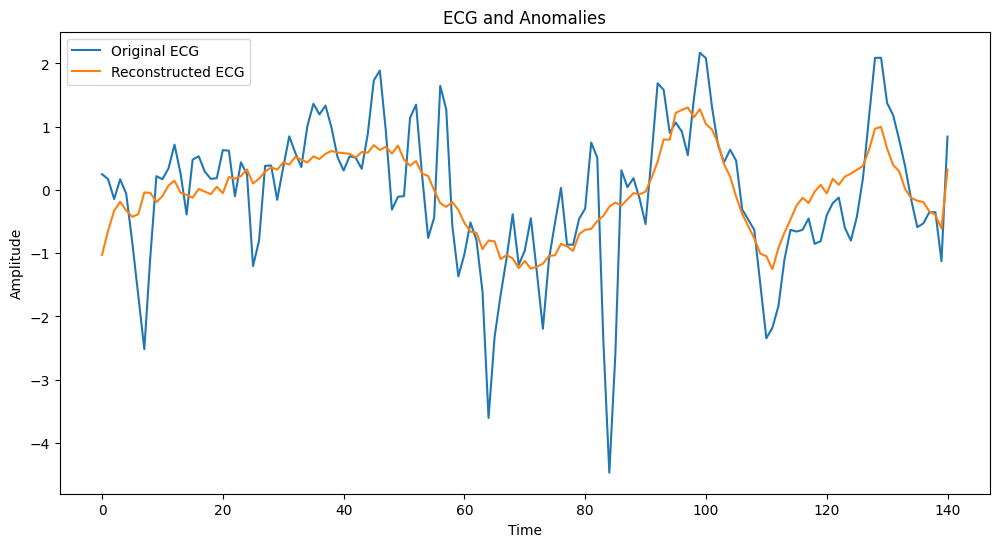

In [51]:
n = 4
anomaly_index = anomalies_index[n]
plt.figure(figsize=(12, 6))
plt.plot(X_test[anomaly_index], label='Original ECG')
plt.plot(y_pred[anomaly_index], label='Reconstructed ECG')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.title('ECG and Anomalies')
plt.show()

In [52]:
# Evaluate the model
y_true = np.zeros(len(X_test))
print("Confusion Matrix:")
print(confusion_matrix(anomalies, anomalies))

print("\nClassification Report:")
print(classification_report(anomalies, anomalies))

Confusion Matrix:
[[950   0]
 [  0  50]]

Classification Report:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       950
        True       1.00      1.00      1.00        50

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



In [53]:
import seaborn as sns

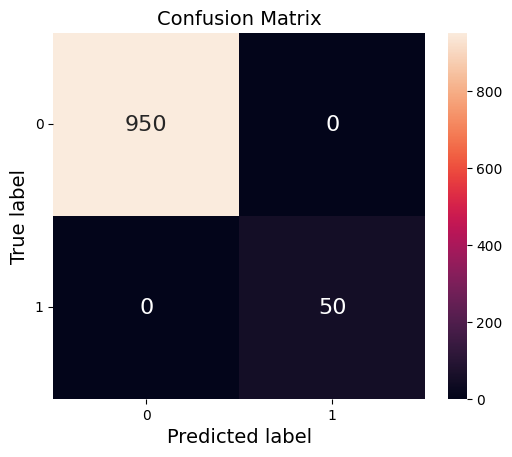

In [54]:
plt.figure(figsize = (6, 4.75))
sns.heatmap(confusion_matrix(anomalies, anomalies), annot = True, annot_kws = {"size": 16}, fmt = 'd')
plt.xticks([0.5, 1.5],  rotation = 'horizontal')
plt.yticks([0.5, 1.5],  rotation = 'horizontal')
plt.xlabel("Predicted label", fontsize = 14)
plt.ylabel("True label", fontsize = 14)
plt.title("Confusion Matrix", fontsize = 14)
plt.grid(False)
plt.show()